# Drug Type Classification ( Multiclass classification)

# Load Dataset and Visualize Top 5 Records
**Detail About Dataset:** 

You've got this dataset of patients, all dealing with the same illness.  During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Our mission? To create a model that figures out which drug might work best for future patients who come in with the same condition.


**The target feature is**

Drug type

**The feature sets are:**

Age

Sex

Blood Pressure Levels (BP)

Cholesterol Levels

Sodium to potassium Ration in Blood


In [6]:
import pandas as pd 

def print_line(sym="=", times=100):
    print(f"\n{sym*times}\n") 
    
drug_df = pd.read_csv(r"drug200.csv")

# Change the name to match naming convention in the target feature.
drug_df['Drug'] = drug_df['Drug'].replace('DrugY', 'drugY')

print_line()
print(f"Number of Samples: {drug_df.shape[0]} \nNumber of features: {drug_df.shape[1]}")
print_line()

print('Top 5 samples') 
print_line('-',20)
display(drug_df.head())




Number of Samples: 200 
Number of features: 6


Top 5 samples

--------------------



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# Statistical Analysis
**Important**

Key points to emphasize here include the count of values, minimum value, standard deviation, and maximum value.

In [7]:
print_line()
print('Feature Data Type and And Null Count:')
print_line('-',40)
drug_df.info()
print_line()

print('Numerical Feature Statistics:')
print_line('-',40)
display(drug_df.describe())

print('\nCategorical Feature Statistics:')
print_line('-',40)
display(drug_df.describe(include=['object']))


print_line()
print("Unique category values and their counts")
print_line('-', 60)
categorical_vars = drug_df.select_dtypes(include=['object','category']).columns.tolist()

for var in categorical_vars:
    print(f"\nCategory Variable: {var}" 
          f"\nUnique Value Count: {len(drug_df[var].unique())}"
          f"\nCategories: {drug_df[var].unique()}")

print_line()



Feature Data Type and And Null Count:

----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Numerical Feature Statistics:

----------------------------------------



,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000



Categorical Feature Statistics:

----------------------------------------



,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91




Unique category values and their counts

------------------------------------------------------------


Category Variable: Sex
Unique Value Count: 2
Categories: ['F' 'M']

Category Variable: BP
Unique Value Count: 3
Categories: ['HIGH' 'LOW' 'NORMAL']

Category Variable: Cholesterol
Unique Value Count: 2
Categories: ['HIGH' 'NORMAL']

Category Variable: Drug
Unique Value Count: 5
Categories: ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']




# Exploratory Data Analysis (EDA) 

## Categorical Feature Analysis

### Count Plot for each Category

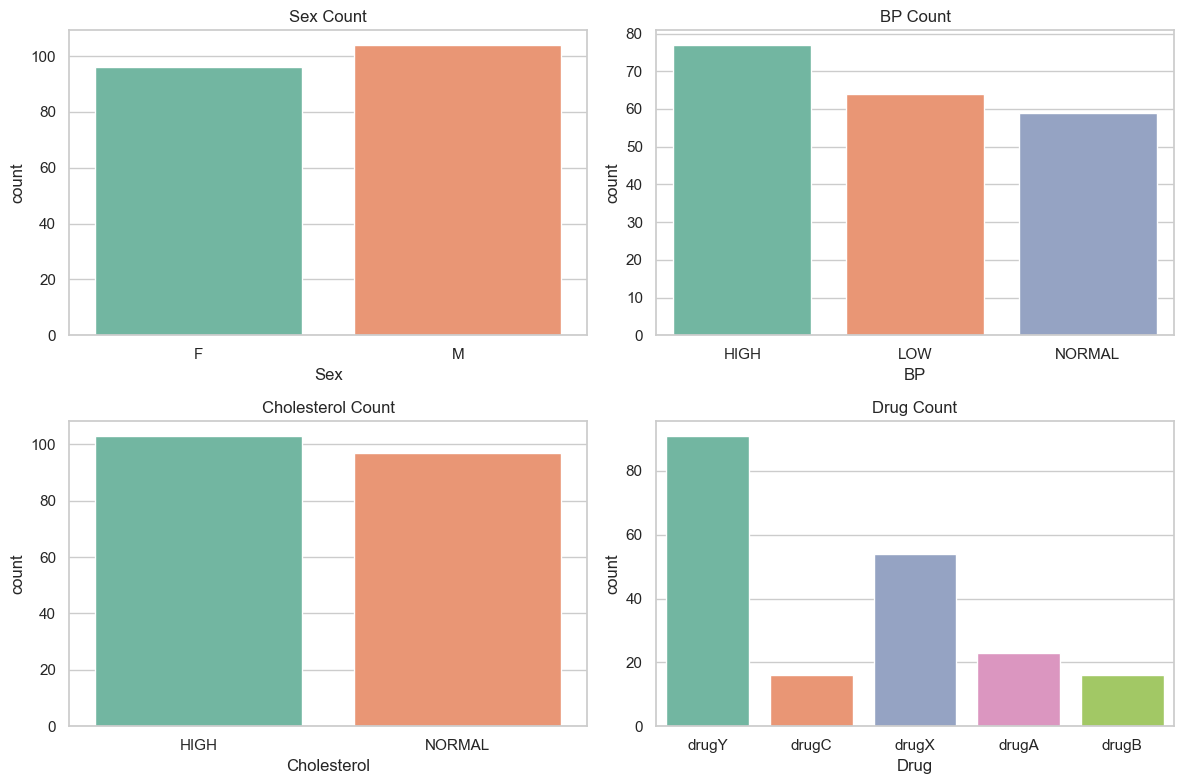

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the count bar plots for each categorical variable
sns.countplot(data=drug_df, x='Sex', ax=axes[0, 0], palette='Set2')
sns.countplot(data=drug_df, x='BP', ax=axes[0, 1], palette='Set2')
sns.countplot(data=drug_df, x='Cholesterol', ax=axes[1, 0], palette='Set2')
sns.countplot(data=drug_df, x='Drug', ax=axes[1, 1], palette='Set2')

# Set titles for each subplot
axes[0, 0].set_title('Sex Count')
axes[0, 1].set_title('BP Count')
axes[1, 0].set_title('Cholesterol Count')
axes[1, 1].set_title('Drug Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Drug Vs Sex, BP and Cholesterol


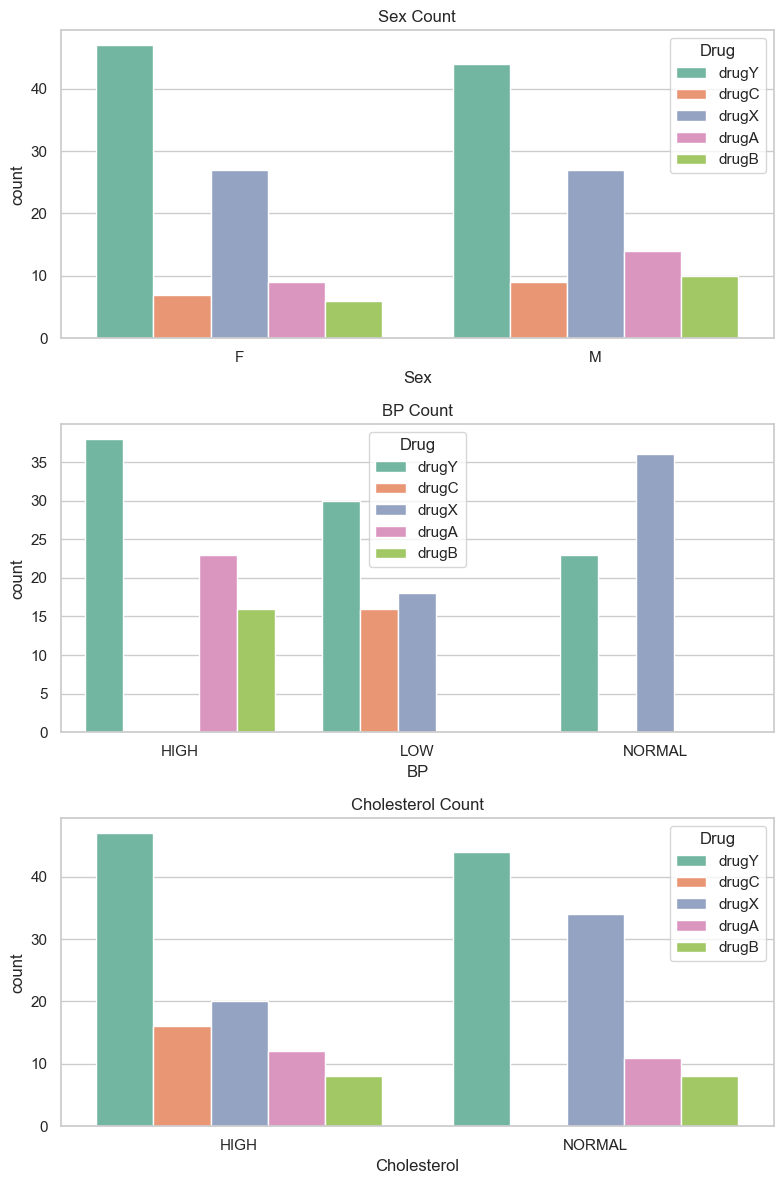

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a 3x1 grid of subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot the count bar plots for each categorical variable
sns.countplot(data=drug_df, x='Sex', ax=axes[0], hue='Drug', palette='Set2')
sns.countplot(data=drug_df, x='BP', ax=axes[1], hue='Drug', palette='Set2')
sns.countplot(data=drug_df, x='Cholesterol', ax=axes[2], hue='Drug', palette='Set2')

# Set titles for each subplot
axes[0].set_title('Sex Count')
axes[1].set_title('BP Count')
axes[2].set_title('Cholesterol Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Numerical Feature Analysis

### Distribution Plot


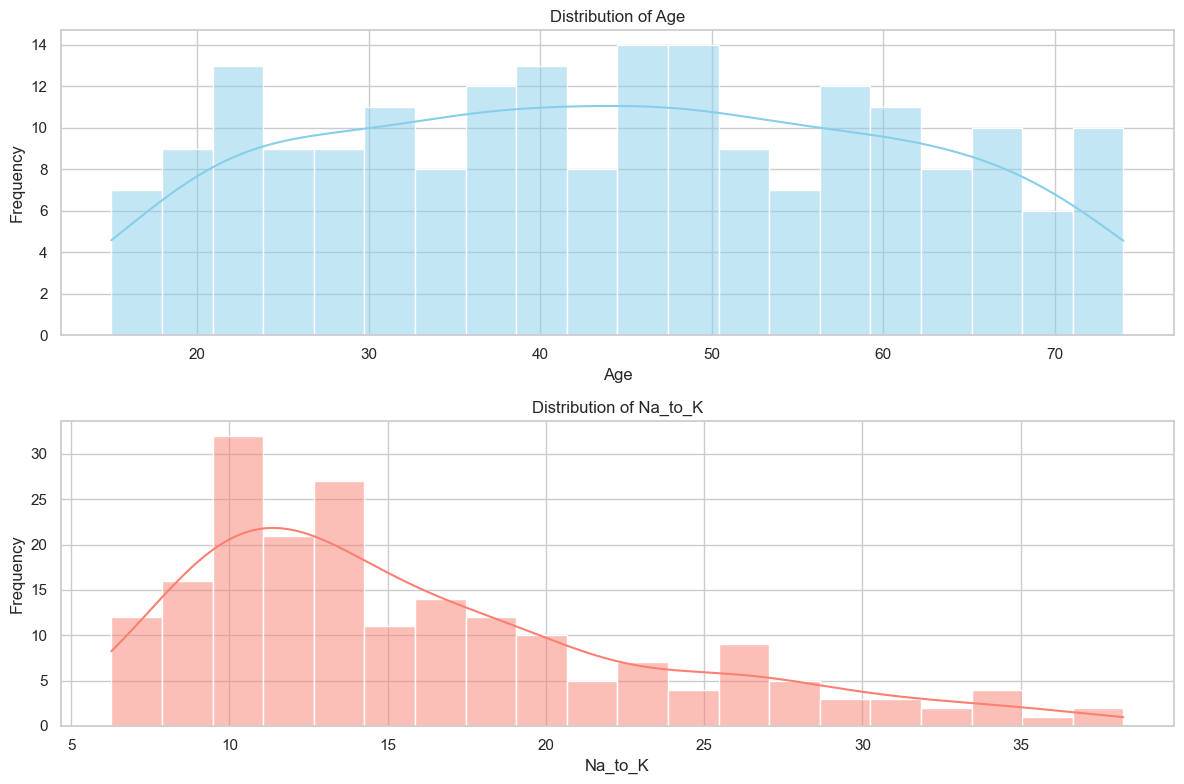

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a 2x1 grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot distribution of 'Age'
sns.histplot(data=drug_df, x='Age', bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot distribution of 'Na_to_K'
sns.histplot(data=drug_df, x='Na_to_K', bins=20, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribution of Na_to_K')
axes[1].set_xlabel('Na_to_K')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



# Preprocessing

## Null Value Analysis and Treatment
**Observation:**

There are no null values in the dataset.

In [11]:
print_line()
display(drug_df.isnull().sum())
print_line()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## Duplicate Check And Removal
**Observation:**

There are no duplicate values in the dataset.

In [12]:
drug_df[drug_df.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


## Outlier Detection and Treatment in Numerical Features 

### Visualization Method 
**Observation:**
We can clearly see outlier in the Na_to_K highlighted with red circles. 

There are other methods for the outlier detection like - 

IQR (Interquartile Range) Method

Z-Score Method

Machine Learning Algorithms: Isolation Forest, Local Outlier Factor (LOF), and One-Class SVM

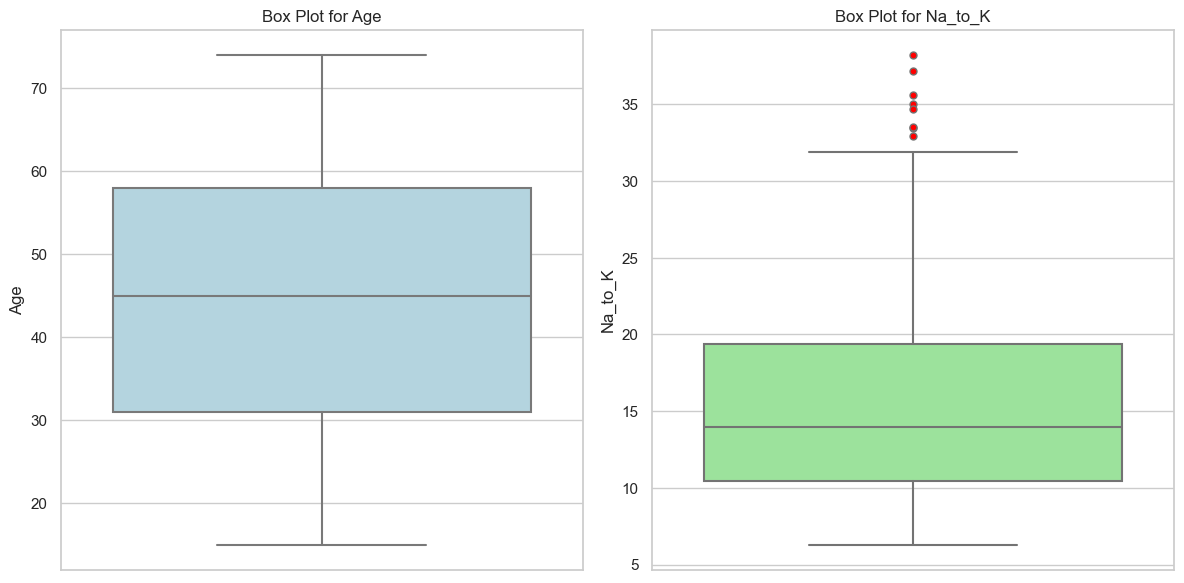

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plot for 'Age'
sns.boxplot(data=drug_df, y='Age', ax=axes[0], color='lightblue', flierprops={'markerfacecolor': 'red', 'marker': 'o'})
axes[0].set_title('Box Plot for Age')

# Box plot for 'Na_to_K'
sns.boxplot(data=drug_df, y='Na_to_K', ax=axes[1], color='lightgreen', flierprops={'markerfacecolor': 'red', 'marker': 'o'})
axes[1].set_title('Box Plot for Na_to_K')

# Show the plots
plt.tight_layout()
plt.show()


**Obervations:** 
There are outliers in the NA_to_K feature

### Remove Outliers from NA_to_K feature

In [14]:
from scipy import stats

# Calculate the Z-scores for 'Na_to_K' column
z_scores = stats.zscore(drug_df['Na_to_K'])

# Define a threshold for outlier detection (e.g., Z-score > 3.0)
threshold = 1.5

# Filter the DataFrame to keep rows with Z-scores within the threshold
filtered_drug_df = drug_df[(z_scores <= threshold)]

# Check the shape of the filtered DataFrame to see how many outliers were removed
print("Original DataFrame shape:", drug_df.shape)
print("Filtered DataFrame shape (outliers removed):", filtered_drug_df.shape)


Original DataFrame shape: (200, 6)
Filtered DataFrame shape (outliers removed): (179, 6)


### Visualize Data After Removing Outliers

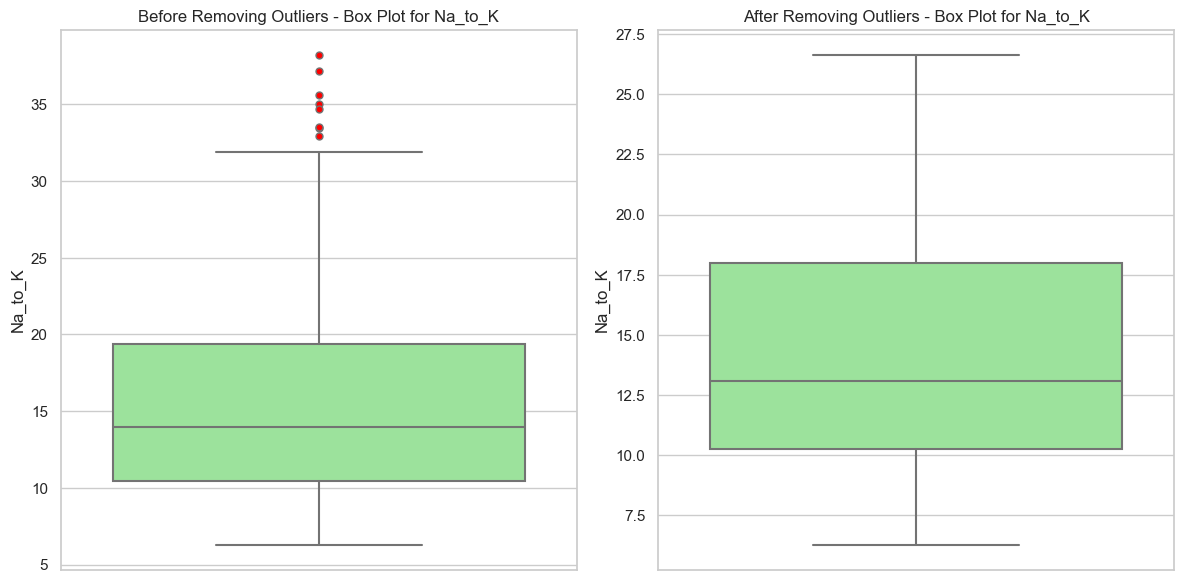

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plot for 'Na_to_K'
sns.boxplot(data=drug_df, y='Na_to_K', ax=axes[0], color='lightgreen', flierprops={'markerfacecolor': 'red', 'marker': 'o'})
axes[0].set_title('Before Removing Outliers - Box Plot for Na_to_K')

# Box plot for 'Na_to_K'
sns.boxplot(data=filtered_drug_df, y='Na_to_K', ax=axes[1], color='lightgreen', flierprops={'markerfacecolor': 'red', 'marker': 'o'})
axes[1].set_title('After Removing Outliers - Box Plot for Na_to_K')

# Show the plots
plt.tight_layout()
plt.show()


# Split Data Into Train(80%) and Test(20%)

In [16]:
from sklearn.model_selection import train_test_split

predictors = filtered_drug_df.drop(labels=['Drug'], axis=1)
target = filtered_drug_df['Drug']

train_predictors, test_predictors, train_target, test_target = train_test_split(predictors,target, test_size=0.2, random_state=1)

print_line()
print('Train predictor size: ', train_predictors.shape)
print('Train target size:', test_target.shape)
print_line()
print('Test predictor size:', test_predictors.shape)
print('Test target size:', test_target.shape)
print_line()



Train predictor size:  (143, 5)
Train target size: (36,)


Test predictor size: (36, 5)
Test target size: (36,)




## Create a Data Preprocessing Pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

# Define the transformers
numeric_features = drug_df.select_dtypes(include=['int64','float64']).columns.tolist()

categorical_features = drug_df.select_dtypes(include=['object','category']).columns.tolist()
categorical_features.remove("Drug")


# Transformations for each group of columns
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown="ignore"))])

# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)])


# Modeling

## Create Model

In [18]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Create a full pipeline including preprocessing and modeling
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier())])

## Train The Model

In [19]:
pipeline.fit(train_predictors, train_target)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Na_to_K']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'BP',
                                                   'Cholesterol'])])),
                ('classifier', AdaBoostClassifier())])

# Model Learning Curve 

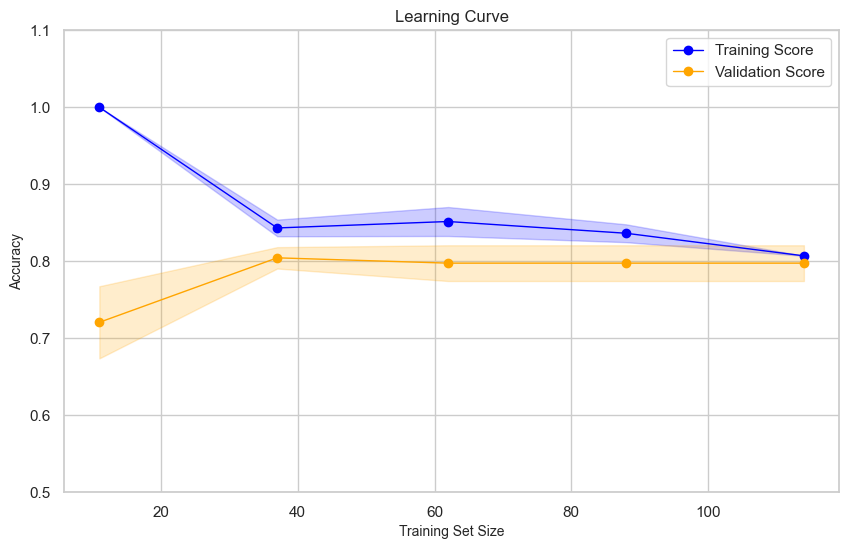

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from numpy import sqrt

# Calculate the learning curve
train_sizes, train_scores, val_scores = learning_curve(pipeline, train_predictors, train_target, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue', marker='o', linewidth=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='orange', marker='o', linewidth=1)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='orange')
plt.xlabel('Training Set Size', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Learning Curve', fontsize=12)
plt.legend(loc='best')
plt.grid(True)

# Set the y-axis limit from 0 to 1.1
plt.ylim(0.5, 1.1)

# Set the y-axis tick format as whole numbers
plt.ticklabel_format(axis='y', style='plain')

# plt.savefig("Insurence Learning Curve.jpg")
plt.show()

# Evaluate Model Performance

## Accuracy

In [23]:
from sklearn.metrics import accuracy_score

test_predictions = pipeline.predict(test_predictors)

# Calculate Accuracy. 
accuracy = f"{round(accuracy_score(test_target, test_predictions),2)*110}%"

accuracy

'97.9%'

## Classification Report 

In [24]:
from sklearn.metrics import classification_report

# Fit the pipeline to your data
pipeline.fit(train_predictors, train_target)

# Predict on the test set
y_pred = pipeline.predict(test_predictors)

# Get the class names (assuming your target variable is categorical)
class_names = pipeline.named_steps['classifier'].classes_

# Generate the classification report
report = classification_report(test_target, y_pred, target_names=class_names, zero_division=0)

# Print the classification report
print(report)


              precision    recall  f1-score   support

       drugA       0.50      1.00      0.67         3
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         1
       drugX       0.93      1.00      0.96        13
       drugY       1.00      1.00      1.00        16

    accuracy                           0.89        36
   macro avg       0.49      0.60      0.53        36
weighted avg       0.82      0.89      0.85        36



## Confusion Metrix

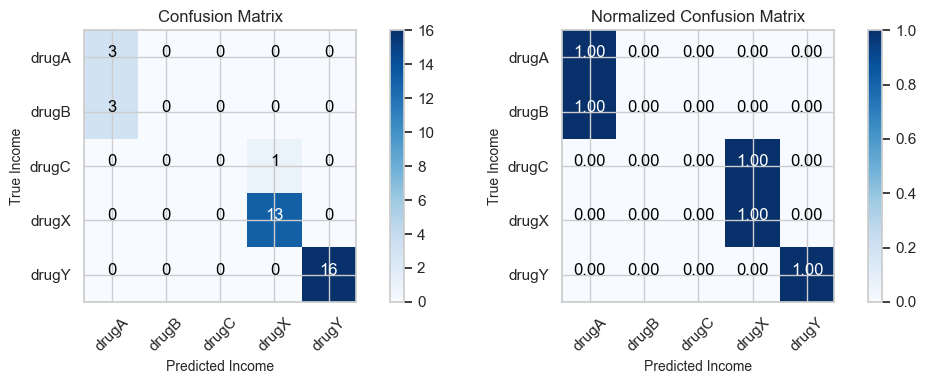

In [26]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=12)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
                
    plt.tight_layout()
    plt.ylabel('True Income', fontsize=10)
    plt.xlabel('Predicted Income', fontsize=10)

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target, test_predictions)
np.set_printoptions(precision=2)

# Plot two confusion matrices side by side
plt.figure(figsize=(12, 4))

class_names = pipeline.classes_
str_class_names = class_names.astype(str)

plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=str_class_names, title='Confusion Matrix')

plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=str_class_names, normalize=True, title='Normalized Confusion Matrix')

plt.tight_layout()

# plt.savefig('Confusion Matrices.jpg')


## ROC - AUC Curve

**Plot ROC Curves:**

Each curve represents the trade-off between true positive rate and false positive rate for a specific class. 

The area under each curve (AUC) is also displayed as a measure of the classifier's performance. 

The dotted line represents a random classifier (no discrimination), and the closer the ROC curve is to the top-left corner, the better the classifier's performance.


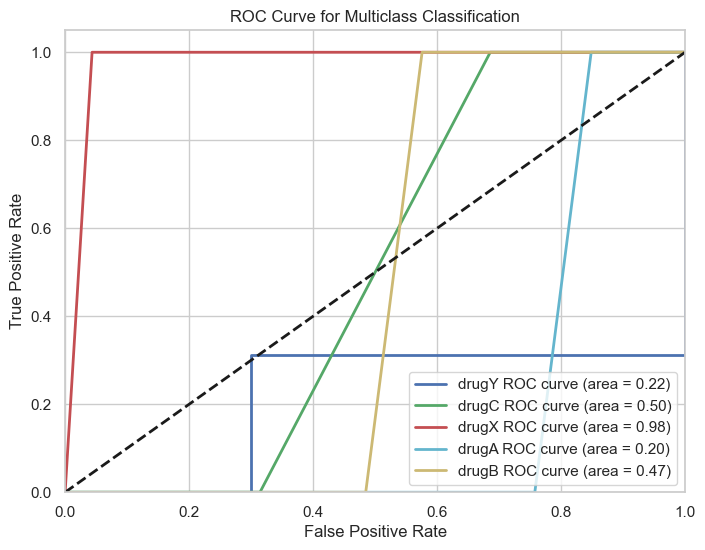

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the test set
y_scores = pipeline.predict_proba(test_predictors)

# Binarize the labels
y_bin = label_binarize(test_target, classes=drug_df['Drug'].unique().tolist())

# Define class names corresponding to class indices
class_names = drug_df['Drug'].unique().tolist()  # Replace this with your actual class names

# Compute ROC curve and ROC area for each class
n_classes = y_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'y'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


## Visualize Actual and Predictions Values

In [99]:
output_df =  test_predictors.copy()
test_predictions = pipeline.predict(test_predictors)

actual_drug = 'Actual Drug'
predicted_drug = "Predicted Drug"

output_df[actual_drug] = test_target
output_df[predicted_drug] = test_predictions
output_df['Missclassification'] = ''

output_df['Missclassification'] = output_df.apply(lambda row: 'No' if row[actual_drug] == row[predicted_drug] else 'Yes', axis=1)

# out_df = output_df[[ 'Actual Income','Predicted Income', 'Missclassification']].head(20)
out_df = output_df.head(30)

# Define a function to map colors to values
def color_map(val):
    # print(val)
    if val == 'Yes':
        color = 'lightcoral'
    elif val == 'No':
        color = 'lightgreen'
    else:
        color = 'lightblue'
    return f'background-color: {color}'

rcParams['figure.figsize'] = 10,10

caption_text = '<h3 style="text-align: center; font-weight: bold; font-size: 16pt"> Drug Class Prediction<br>(Multi-Class Classification)</h3>'

styled_df = (out_df.style.applymap(color_map, subset=['Missclassification'])
             .set_caption(caption_text)
             .set_properties(**{'border': '1px solid black'})
            )

styled_df

,Age,Sex,BP,Cholesterol,Na_to_K,Actual Drug,Predicted Drug,Missclassification
130,70,F,NORMAL,HIGH,20.489000,DrugY,DrugY,No
97,56,F,HIGH,HIGH,25.395000,DrugY,DrugY,No
111,47,F,NORMAL,NORMAL,6.683000,drugX,drugX,No
178,39,M,NORMAL,HIGH,15.969000,DrugY,DrugY,No
39,15,M,NORMAL,HIGH,9.084000,drugX,drugX,No
62,67,M,LOW,NORMAL,20.693000,DrugY,DrugY,No
141,64,F,LOW,NORMAL,25.741000,DrugY,DrugY,No
19,32,F,HIGH,NORMAL,25.974000,DrugY,DrugY,No
123,36,F,NORMAL,HIGH,16.753000,DrugY,DrugY,No
142,60,M,HIGH,NORMAL,8.621000,drugB,drugA,Yes
